In [15]:
import pydicom
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from os import listdir
import os

pydicom.dcmread("/home/najmanl/data/rsna-intracranial-hemorrhage-detection/stage_1_train_images/ID_5c8b5d701.dcm")

(0008, 0018) SOP Instance UID                    UI: ID_5c8b5d701
(0008, 0060) Modality                            CS: 'CT'
(0010, 0020) Patient ID                          LO: 'ID_7fa2490c'
(0020, 000d) Study Instance UID                  UI: ID_9f8138efb6
(0020, 000e) Series Instance UID                 UI: ID_34c0b81444
(0020, 0010) Study ID                            SH: ''
(0020, 0032) Image Position (Patient)            DS: ['-112', '-20.596', '145.67']
(0020, 0037) Image Orientation (Patient)         DS: ['1', '0', '0', '0', '1', '0']
(0028, 0002) Samples per Pixel                   US: 1
(0028, 0004) Photometric Interpretation          CS: 'MONOCHROME2'
(0028, 0010) Rows                                US: 512
(0028, 0011) Columns                             US: 512
(0028, 0030) Pixel Spacing                       DS: ['0.4375', '0.4375']
(0028, 0100) Bits Allocated                      US: 16
(0028, 0101) Bits Stored                         US: 12
(0028, 0102) High Bit         

In [2]:
train = pd.read_csv("/home/najmanl/data/rsna-intracranial-hemorrhage-detection/stage_1_train.csv")
train2=train
train.head(10)

,ID,Label
0,ID_63eb1e259_epidural,0
1,ID_63eb1e259_intraparenchymal,0
2,ID_63eb1e259_intraventricular,0
3,ID_63eb1e259_subarachnoid,0
4,ID_63eb1e259_subdural,0
5,ID_63eb1e259_any,0
6,ID_2669954a7_epidural,0
7,ID_2669954a7_intraparenchymal,0
8,ID_2669954a7_intraventricular,0
9,ID_2669954a7_subarachnoid,0


In [3]:
label = train.Label.values
train = train.ID.str.rsplit("_", n=1, expand=True)
train.loc[:, "label"] = label
train = train.rename({0: "id", 1: "subtype"}, axis=1)
train.head(10)

,id,subtype,label
0,ID_63eb1e259,epidural,0
1,ID_63eb1e259,intraparenchymal,0
2,ID_63eb1e259,intraventricular,0
3,ID_63eb1e259,subarachnoid,0
4,ID_63eb1e259,subdural,0
5,ID_63eb1e259,any,0
6,ID_2669954a7,epidural,0
7,ID_2669954a7,intraparenchymal,0
8,ID_2669954a7,intraventricular,0
9,ID_2669954a7,subarachnoid,0


Text(0.5, 1.0, 'Multi-Hot occurences')

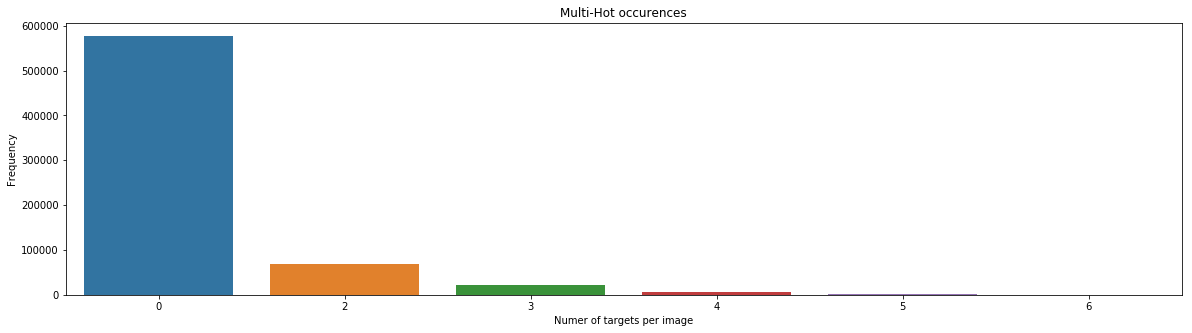

In [6]:
multi_target_count = train.groupby("id").label.sum()

fig, ax = plt.subplots(1,1,figsize=(20,5))

sns.countplot(multi_target_count, ax=ax)
ax.set_xlabel("Numer of targets per image")
ax.set_ylabel("Frequency")
ax.set_title("Multi-Hot occurences")

In [7]:
train=train2
train['type'] = train['ID'].str.split("_", n = 3, expand = True)[2]
train['PatientID'] = train['ID'].str.split("_", n = 3, expand = True)[1]

train.head(10)

,ID,Label,type,PatientID
0,ID_63eb1e259_epidural,0,epidural,63eb1e259
1,ID_63eb1e259_intraparenchymal,0,intraparenchymal,63eb1e259
2,ID_63eb1e259_intraventricular,0,intraventricular,63eb1e259
3,ID_63eb1e259_subarachnoid,0,subarachnoid,63eb1e259
4,ID_63eb1e259_subdural,0,subdural,63eb1e259
5,ID_63eb1e259_any,0,any,63eb1e259
6,ID_2669954a7_epidural,0,epidural,2669954a7
7,ID_2669954a7_intraparenchymal,0,intraparenchymal,2669954a7
8,ID_2669954a7_intraventricular,0,intraventricular,2669954a7
9,ID_2669954a7_subarachnoid,0,subarachnoid,2669954a7


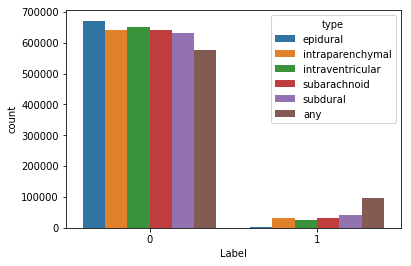

In [8]:
sns.countplot(x="Label", hue="type", data=train)

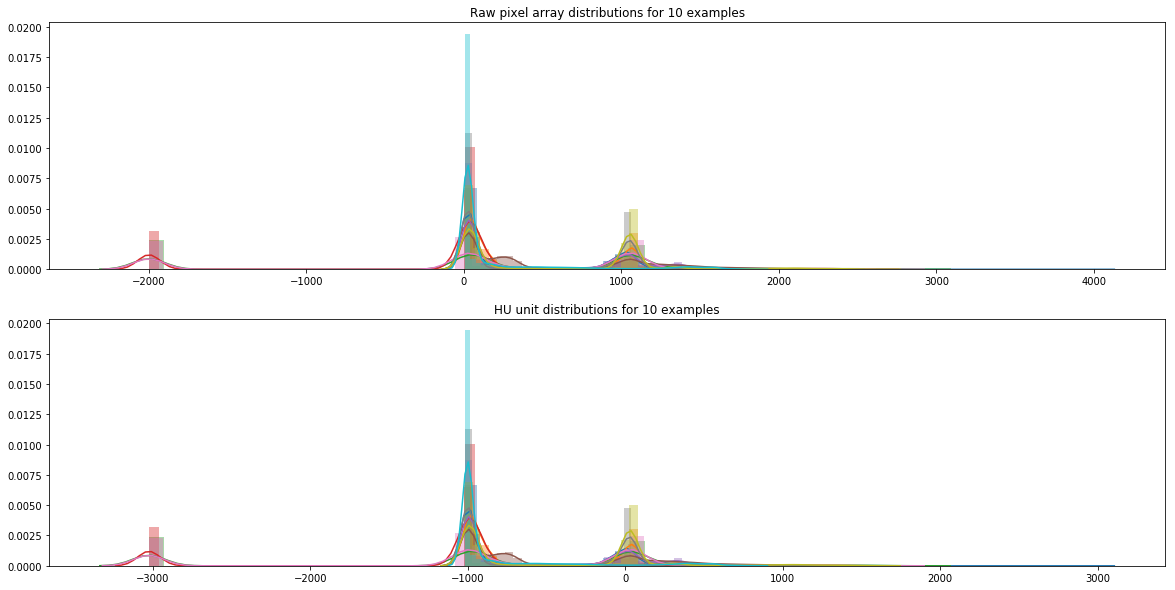

In [12]:
train_dir = "/home/najmanl/data/rsna-intracranial-hemorrhage-detection/stage_1_train_images/"
train_files = listdir(train_dir)

fig, ax = plt.subplots(2,1,figsize=(20,10))
for file in train_files[0:10]:
    dataset = pydicom.dcmread(train_dir + file)
    image = dataset.pixel_array.flatten()
    rescaled_image = image * dataset.RescaleSlope + dataset.RescaleIntercept
    sns.distplot(image.flatten(), ax=ax[0]);
    sns.distplot(rescaled_image.flatten(), ax=ax[1])
ax[0].set_title("Raw pixel array distributions for 10 examples")
ax[1].set_title("HU unit distributions for 10 examples");

In [25]:
TRAIN_IMG_PATH = "/home/najmanl/data/rsna-intracranial-hemorrhage-detection/stage_1_train_images/"
TEST_IMG_PATH = "/home/najmanl/data/rsna-intracranial-hemorrhage-detection/stage_1_test_images/"
BASE_PATH = '/home/najmanl/data/rsna-intracranial-hemorrhage-detection/'
TRAIN_DIR = 'stage_1_train_images/'
TEST_DIR = 'stage_1_test_images/'
   
def view_images(images, title = '', aug = None):
    width = 5
    height = 2
    fig, axs = plt.subplots(height, width, figsize=(15,5))
    
    for im in range(0, height * width):
        data = pydicom.read_file(os.path.join(TRAIN_IMG_PATH,'ID_'+images[im]+ '.dcm'))
        image = data.pixel_array
        window_center , window_width, intercept, slope = get_windowing(data)
        image_windowed = window_image(image, window_center, window_width, intercept, slope)


        i = im // width
        j = im % width
        axs[i,j].imshow(image_windowed, cmap=plt.cm.bone) 
        axs[i,j].axis('off')
        
    plt.suptitle(title)
    plt.show()

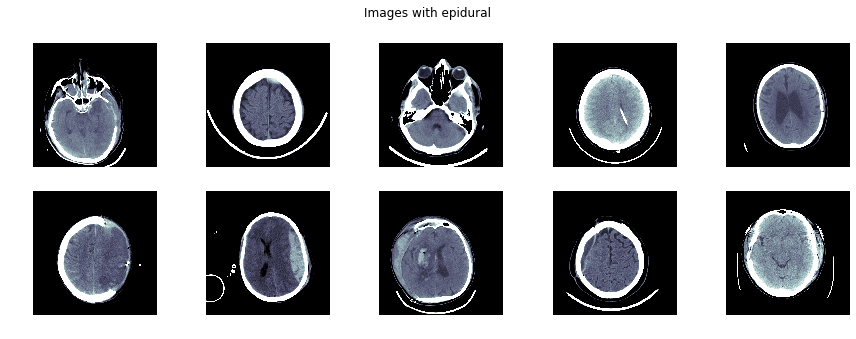

In [26]:
view_images(train[(train['type'] == 'epidural') & (train['Label'] == 1)][:10].PatientID.values, title = 'Images with epidural')

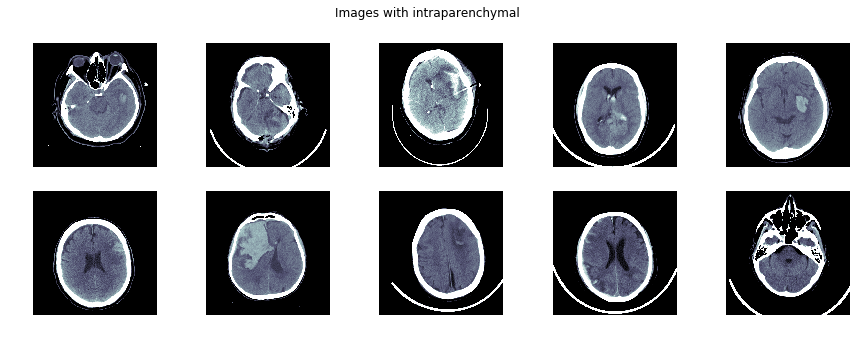

In [27]:
view_images(train[(train['type'] == 'intraparenchymal') & (train['Label'] == 1)][:10].PatientID.values, title = 'Images with intraparenchymal')

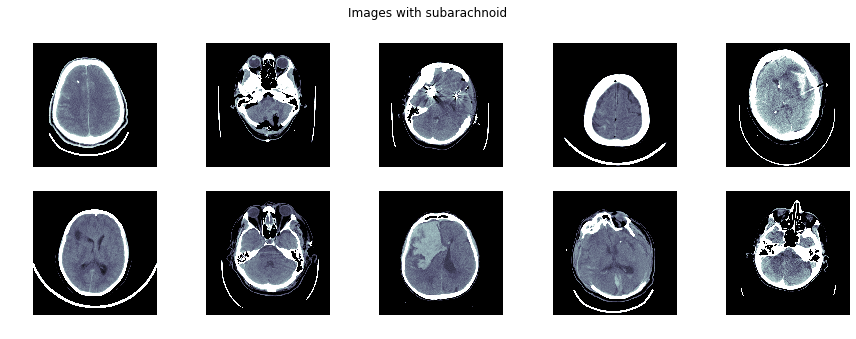

In [28]:
view_images(train[(train['type'] == 'subarachnoid') & (train['Label'] == 1)][:10].PatientID.values, title = 'Images with subarachnoid')

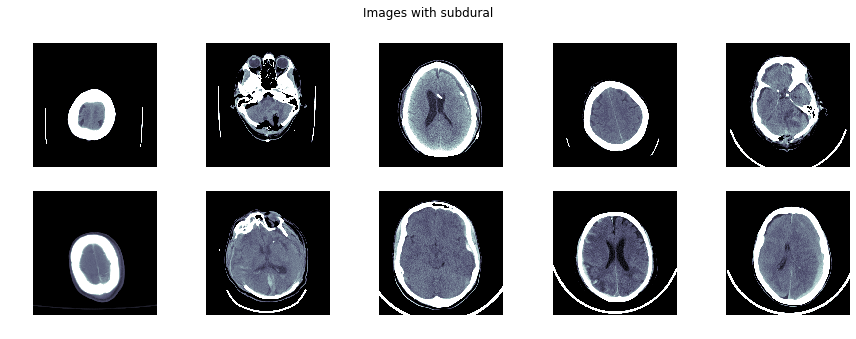

In [29]:
view_images(train[(train['type'] == 'subdural') & (train['Label'] == 1)][:10].PatientID.values, title = 'Images with subdural')

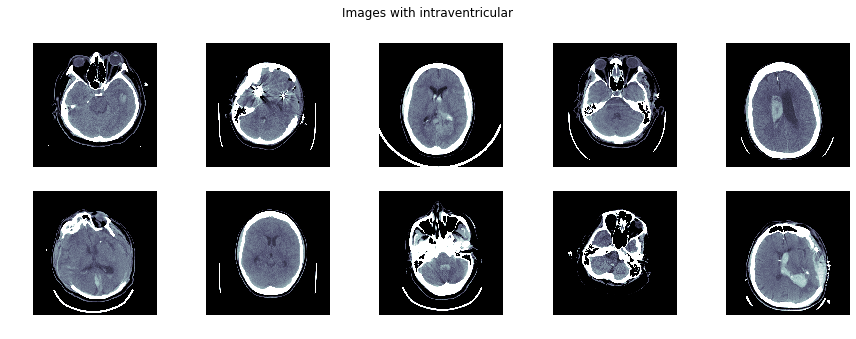

In [30]:
view_images(train[(train['type'] == 'intraventricular') & (train['Label'] == 1)][:10].PatientID.values, title = 'Images with intraventricular')